# "Análisis Gráfico de Tendencias y Estacionalidades en las Vistas Diarias del Foro de freeCodeCamp (Mayo 2016 - Diciembre 2019)"


Para este proyecto, se visualizará los datos de las series temporales utilizando un gráfico de líneas, un gráfico de barras y un gráfico de cajas. Se utilizará Pandas, Matplotlib y Seaborn para visualizar un conjunto de datos que contiene el número de vistas diarias en la página del foro de freeCodeCamp.org del 2016-05-09 al 2019-12-03. Las visualizaciones de datos le ayudarán a entender los patrones en las visitas e identificarán el crecimiento anual y mensual.

You can download dataset here: 👇👇

https://github.com/WLozanoH/projects_freecodecamp/blob/main/projects/fcc-forum-pageviews.csv

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

📌 Usar Pandas para importar los datos desde "fcc-forum-pageviews.csv". Establece el índice para la columna date.

In [29]:
#cargando la data
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'],index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [30]:
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


📌 Limpiar los datos filtrando los días en que las vistas de la página se encuentren en un alto de 2.5%(equivale al 97.5%) del conjunto de datos o inferior de 2.5% del conjunto de datos.

In [31]:
lower_limit = df['value'].quantile(0.025) #2.5 mas bajo
upper_limit = df['value'].quantile(0.975) #2.5 mas alto

#filtrando la data 
print(df.shape)
df_filtered = df[(df['value'] >= lower_limit) & (df['value'] <= upper_limit)]
print(df.shape)

(1304, 1)
(1304, 1)


📌 Crear una función draw_line_plot que use Matplotlib para dibujar un gráfico de línea similar a "Examples/Figure_1.png". El título debería ser Daily freeCodeCamp Forum Page Views 5/2016-12/2019. La etiqueta en el eje x debería ser Date y la etiqueta en el eje y debería ser Page Views.

In [32]:
def draw_line_plotd(df):
    #crear la figura y el gráfico de línea
    plt.figure(figsize=(15,5))
    plt.plot(df.index, df['value'], 'r-', linewidth = 1)
    
    #Añadimos título y etiquetas a los ejes
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016 - 12/2019', fontsize = 15)
    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('Page Views', fontsize = 12)
    
    #rotamos las etiquetas del eje x para mejor visualización
    plt.xticks(rotation = 0)
    
    
    #Ajustamos el diseño del gráfico
    plt.tight_layout()
    
    #mostramos el gráfico
    plt.show()
    
    

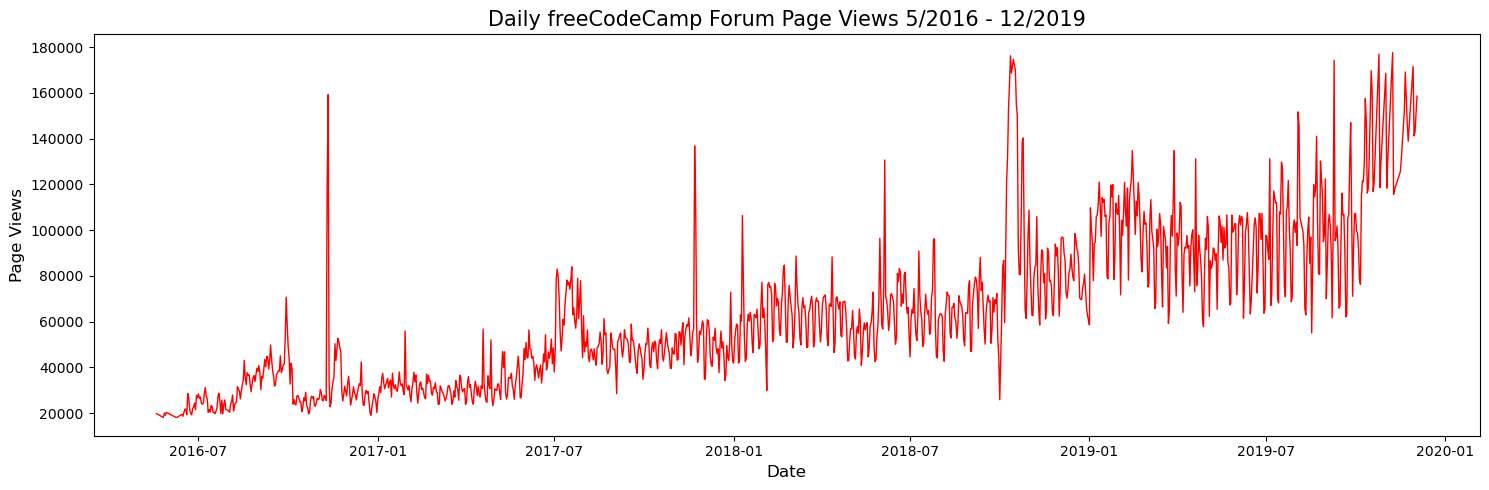

In [33]:
draw_line_plotd(df_filtered)

📌 Ahora, Crear una función draw_bar_plot que dibuje un gráfico de barras similar a "examples/Figure_2.png". Debería mostrar el promedio diario de vistas a la página para cada mes agrupadas por año. La leyenda debería mostrar etiquetas mensuales y tener un título de Months. En la gráfica, la etiqueta en el eje x debería ser 'Years' y la etiqueta en el eje y debería ser 'Average Page Views'.

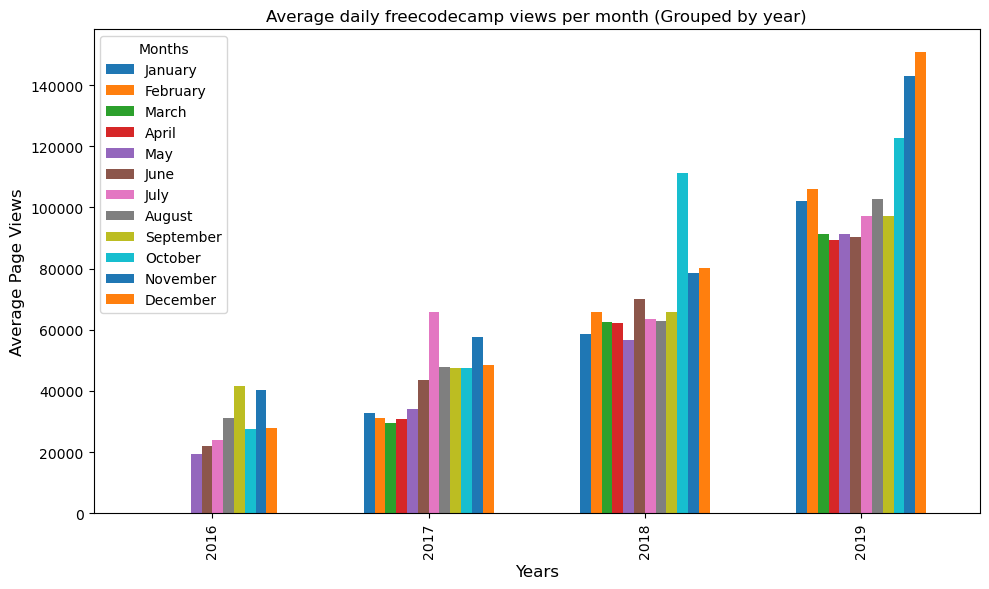

In [34]:
def draw_bar_plot(df):
    #Agrupar los datos por año y por mes y calcular el promedio de vistas por mes
    df_bar = df.resample('ME').mean()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] =  df_bar.index.month_name()
    
    #Pivotar los datos para organizar los años como columnas y los meses como filas
    df_pivot = df_bar.pivot_table(index='year', columns= 'month', values='value')
    
    #Ordernar los meses en el orden correcto
    df_pivot = df_pivot[['January','February','March','April','May','June','July','August','September','October','November','December']]

    #crear la figura y grafico de barras:
    df_pivot.plot(kind= 'bar', figsize = (10,6), width = 0.6)

    #Añadir títulos y etiquetas
    plt.title('Average daily freecodecamp views per month (Grouped by year)')
    plt.xlabel('Years', fontsize = 12)
    plt.ylabel('Average Page Views', fontsize = 12)
    
    #Añadir la legenda con el título 'Months'
    plt.legend(title = 'Months')
    
    #ajustar el diseño del gráfico
    plt.tight_layout()
    
    #mostrar el gráfico
    plt.show()
    
draw_bar_plot(df_filtered)  

📌 Crear draw_box_plot una función que use Seaborn para dibujar dos puntos de caja adyacentes similar a "examples/Figure_3.png". Estos diagramas de caja deberían mostrar como los valores son distribuídos dentro de un año dado o mes y como se compara con el tiempo. El título del primer gráfico debería ser 'Year-wise Box Plot (Trend)' y el título del segundo gráfico debería ser 'Month-wise Box Plot (Seasonality)'. Asegurese que la etiqueta mes mes en la parte inferior empiece en Jan y los ejes x y y estén etiquetados correctamente. La plantilla incluye comandos para preparar los datos.

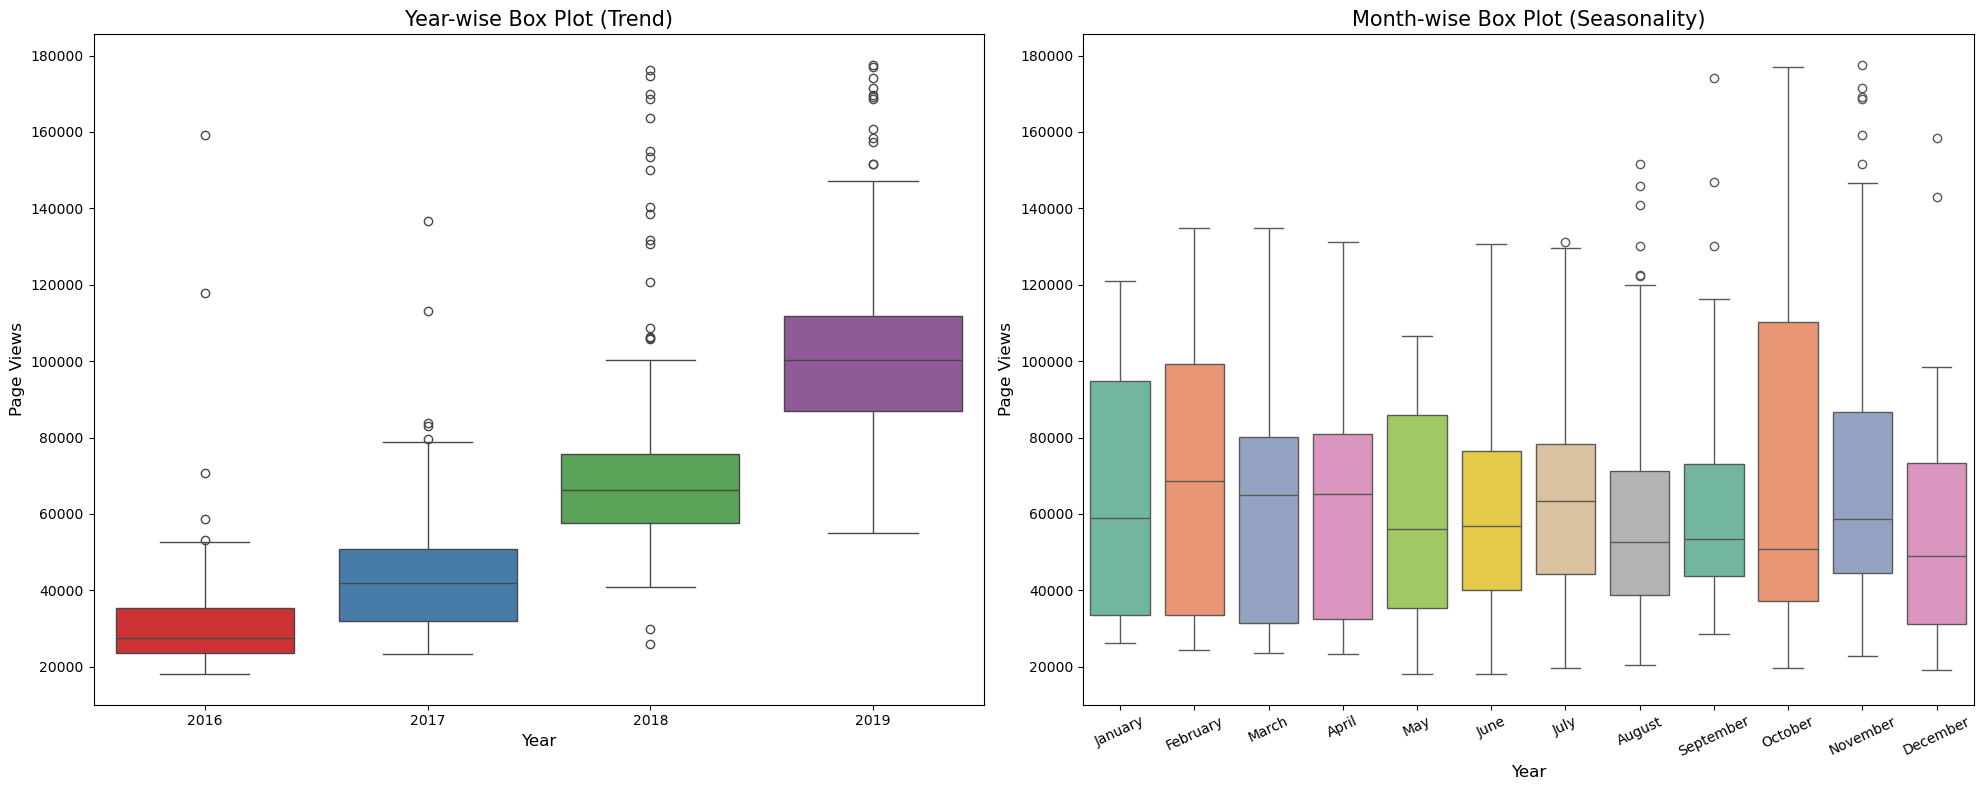

In [35]:
def draw_box_plot(df):
    #preparar los datos para el boxplot
    df_box = df.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.month_name()
    
    #ordernar los datos en 'month' para que comiencen en enero
    df_box['month'] = pd.Categorical(df_box['month'],
                                     categories=['January','February','March','April','May','June','July','August','September','October','November','December'],
                                     ordered= True)
    #crear la figura para los dos subgráficos:
    fig,axes = plt.subplots(1,2,figsize = (20,8))
    fig.subplots_adjust(hspace= 1)

    
    #primer gráfico boxplot: 'Year-wise Box Plot (Trend)'
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette  = 'Set1')
    axes[0].set_title('Year-wise Box Plot (Trend)', fontsize = 15)
    axes[0].set_xlabel('Year', fontsize = 12)
    axes[0].set_ylabel('Page Views', fontsize = 12)

    
    #segundo gráfico boxplot: 'Month-wise Box Plot (Seasonality)'
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], palette  = 'Set2')
    axes[1].set_title('Month-wise Box Plot (Seasonality)', fontsize = 15)
    axes[1].set_xlabel('Year', fontsize = 12)
    axes[1].set_ylabel('Page Views', fontsize = 12)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 25)
    
    #ajustar el diseño de los gráficos
    plt.tight_layout()
    
    #mostrar el gráfico
    plt.show()

draw_box_plot(df_filtered)

🎯 CONCLUSIONES:

📌 *1.Crecimiento Sostenido:* Se observa un crecimiento constante en las vistas diarias del foro de freeCodeCamp entre mayo de 2016 y diciembre de 2019, indicando un aumento en la popularidad y participación de los usuarios.

📌 *2.Identificación de Picos:* Los gráficos de líneas destacan picos en las vistas que pueden correlacionarse con eventos clave, como lanzamientos de cursos o campañas, presentando oportunidades para mejorar la retención y el engagement.

📌 *3.Estacionalidad:* Los diagramas de caja revelan patrones estacionales en las vistas, sugiriendo que ciertos meses tienen mayor actividad. Comprender esta variabilidad puede ayudar en la planificación de contenido.

📌 *4.Promedio Mensual:* El análisis de barras muestra el promedio de vistas por mes, permitiendo comparaciones anuales y destacando meses clave para estrategias de marketing.

📌 *5.Eliminación de Valores Atípicos:* Filtrar datos atípicos mejora la precisión del análisis y asegura visualizaciones más representativas.

📌 *6.Recomendaciones Estratégicas:* Se aconseja aprovechar los picos en vistas y crear contenido durante meses de baja actividad para equilibrar el tráfico.

📌 *7.Monitoreo Continuo:* Este análisis establece una base para un seguimiento regular, permitiendo adaptarse a las dinámicas cambiantes del tráfico y optimizar estrategias futuras.